# Study of Jet Energy Correction Uncertainty Sources

Here we are investigating the jet energy correction uncertainty. We compare the total uncertainty to the individual sources of the uncertainty. The uncertainties are: 
   * Pileup
   * Relative
   * Absolute
   * Fragmentation
   * Single pion response
   * Flavor
   
   
There are two control variables in the cell following this. `softdropstr` can be either `"\_softdrop"` or `""` (empty string for ungroomed). The `scalePtBins` variable is `False` for the absolute cross section, and `True` for the normalized cross section. You need to restart the kernel each time. 

The script will print pdf and png files of the comparisons. 


In [1]:
import ROOT
ROOT.gROOT.Macro("rootlogon.C")


softdropstr = "_softdrop"
#softdropstr = ""

scalePtBins = False



Welcome to JupyROOT 6.08/06


#### Add some utility scripts as `driver` and load the needed RooUnfold libraries

In [2]:
import os
import sys

sys.path.append( os.path.abspath('.'))

from HistDriver import *

from Unfolder import *


ROOT.gSystem.Load("RooUnfold/libRooUnfold")


driver = HistDriver()

#### Set the style and get the legend

In [3]:
ROOT.gStyle.SetOptStat(000000)
ROOT.gStyle.SetTitleOffset(1.0, "Y");
ROOT.gStyle.SetPadRightMargin(0.15)
ROOT.gStyle.SetTitleFont(43,"XYZ")
ROOT.gStyle.SetTitleSize(30,"XYZ")
ROOT.gStyle.SetTitleOffset(1.0, "X")
ROOT.gStyle.SetTitleOffset(0.8, "Y")
ROOT.gStyle.SetLabelFont(43,"XYZ")
ROOT.gStyle.SetLabelSize(22,"XYZ")


leg = ROOT.TLegend(0.2, 0.7, 0.6, 0.85)
leg.SetNColumns(2)
leg.SetFillColor(0)
leg.SetBorderSize(0)


#### Open the file. 
If you want to look at MC, use 2DClosure_expunc.root

In [4]:
lumi = 2.3e3
infile = "2DData_expunc.root"
pythia = ROOT.TFile(infile)

#### Set the uncertainty sources. 
First, we get ALL of the names (the integer in the list corresponds to the appropriate histogram in the ROOT file). Then, we get the names of the sources we want in `jecUncSrcs`

In [5]:


# All jet energy uncertainty sources
allJecUncSrcNames = [
    "AbsoluteStat","AbsoluteScale","AbsoluteFlavMap","AbsoluteMPFBias",
    "Fragmentation",
    "SinglePionECAL","SinglePionHCAL",
    "FlavorQCD",
    "TimeEta","TimePt",
    "RelativeJEREC1","RelativeJEREC2","RelativeJERHF","RelativePtBB","RelativePtEC1","RelativePtEC2","RelativePtHF","RelativeFSR","RelativeStatFSR","RelativeStatEC","RelativeStatHF",
    "PileUpDataMC","PileUpPtRef","PileUpPtBB","PileUpPtEC1","PileUpPtEC2","PileUpPtHF","PileUpMuZero","PileUpEnvelope",
    "SubTotalPileUp","SubTotalRelative","SubTotalPt","SubTotalScale","SubTotalAbsolute","SubTotalMC",
    "Total","TotalNoFlavor","TotalNoTime","TotalNoFlavorNoTime",
    "FlavorZJet","FlavorPhotonJet","FlavorPureGluon","FlavorPureQuark","FlavorPureCharm","FlavorPureBottom",
    "TimeRunA","TimeRunB","TimeRunC","TimeRunD",
    "CorrelationGroupMPFInSitu","CorrelationGroupIntercalibration","CorrelationGroupbJES","CorrelationGroupFlavor","CorrelationGroupUncorrelated",
]
allJecUncSrcs = dict(
    zip( allJecUncSrcNames, [i for i in xrange( len(allJecUncSrcNames) )] )
)

# Jet energy uncertainty sources to use
jecUncSrcs = [
    "Total",
    "SubTotalPileUp",
    "SubTotalRelative",
    "SubTotalAbsolute",
    "Fragmentation",
    "SinglePionECAL","SinglePionHCAL",
    "FlavorQCD"    
]



#### Get the actual RooUnfoldResponse object and compute relative differences to nominal

It has already been unfolded, so get the `Hreco` object, which is the unfolded distribution. Normalize according to user taste for the pt bins, but always scale to unity and divide by bin width. We then take the relative difference to the nominal case. 

In [6]:
nom = pythia.Get("2d_response" + softdropstr).Hreco()
driver.normalizeHist( nom,  normalizeUnity=True, divideByBinWidths=True, scalePtBins = scalePtBins )
jecsrcs = []

for i,jec in enumerate(jecUncSrcs): 
    jecsrcs.append( [pythia.Get('2d_response' + softdropstr + '_jecsrc'+str(allJecUncSrcs[jec])+'up').Hreco(), 
                     pythia.Get('2d_response' + softdropstr + '_jecsrc'+str(allJecUncSrcs[jec])+'dn').Hreco()] )

    driver.normalizeHist( jecsrcs[i][0],  normalizeUnity=True, divideByBinWidths=True, scalePtBins = scalePtBins )
    driver.normalizeHist( jecsrcs[i][1],  normalizeUnity=True, divideByBinWidths=True, scalePtBins = scalePtBins )

    jecsrcs[i][0].Add( nom, -1.0 )
    jecsrcs[i][1].Add( nom, -1.0 )
    jecsrcs[i][0].Divide( nom )
    jecsrcs[i][1].Divide( nom )
    

#### Make the plots. 

Info in <TCanvas::Print>: png file jec_comparison_1_absolute_softdrop.png has been created
Info in <TCanvas::Print>: pdf file jec_comparison_1_absolute_softdrop.pdf has been created
Info in <TCanvas::Print>: png file jec_comparison_2_absolute_softdrop.png has been created
Info in <TCanvas::Print>: pdf file jec_comparison_2_absolute_softdrop.pdf has been created
Info in <TCanvas::Print>: png file jec_comparison_3_absolute_softdrop.png has been created
Info in <TCanvas::Print>: pdf file jec_comparison_3_absolute_softdrop.pdf has been created
Info in <TCanvas::Print>: png file jec_comparison_4_absolute_softdrop.png has been created
Info in <TCanvas::Print>: pdf file jec_comparison_4_absolute_softdrop.pdf has been created
Info in <TCanvas::Print>: png file jec_comparison_5_absolute_softdrop.png has been created
Info in <TCanvas::Print>: pdf file jec_comparison_5_absolute_softdrop.pdf has been created
Info in <TCanvas::Print>: png file jec_comparison_6_absolute_softdrop.png has been created

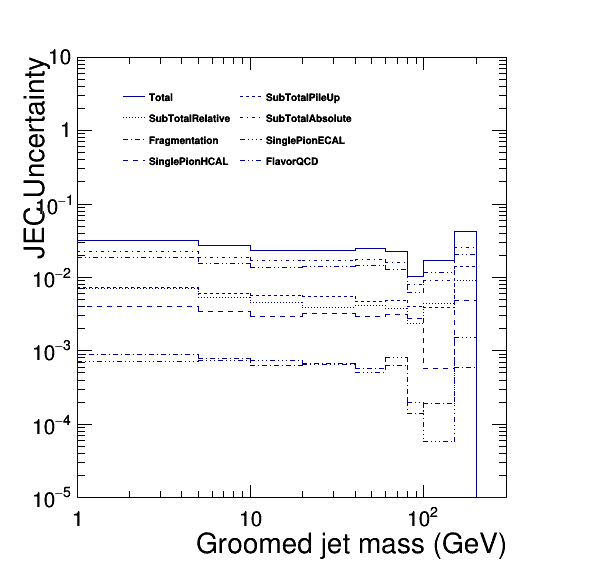

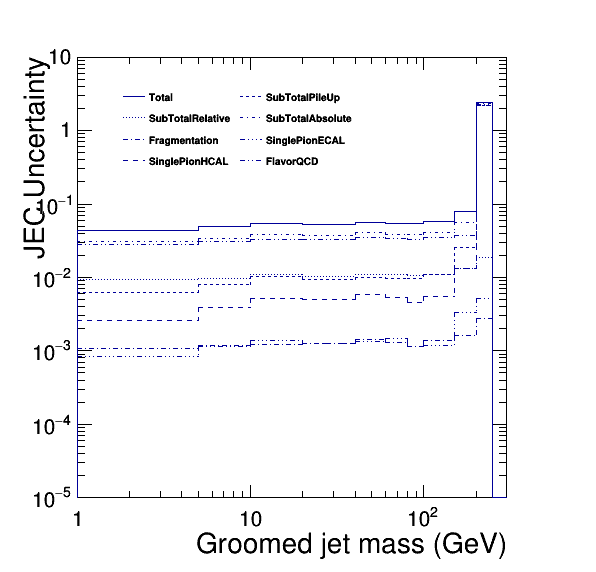

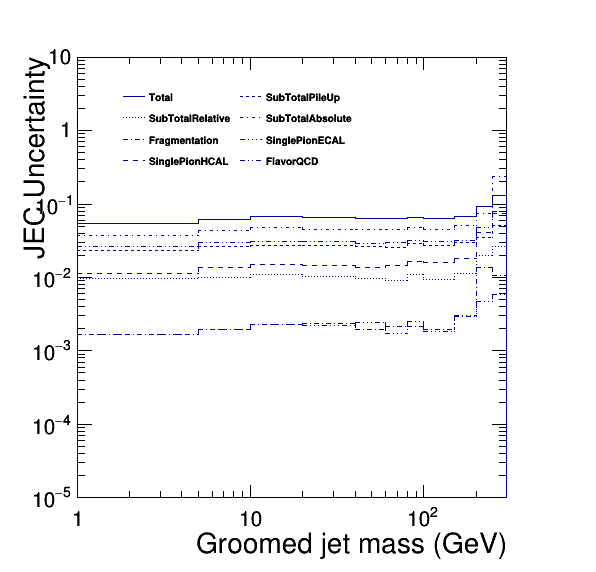

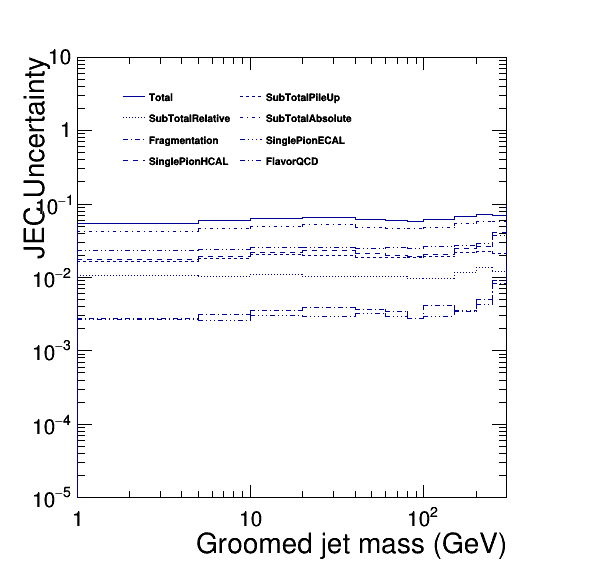

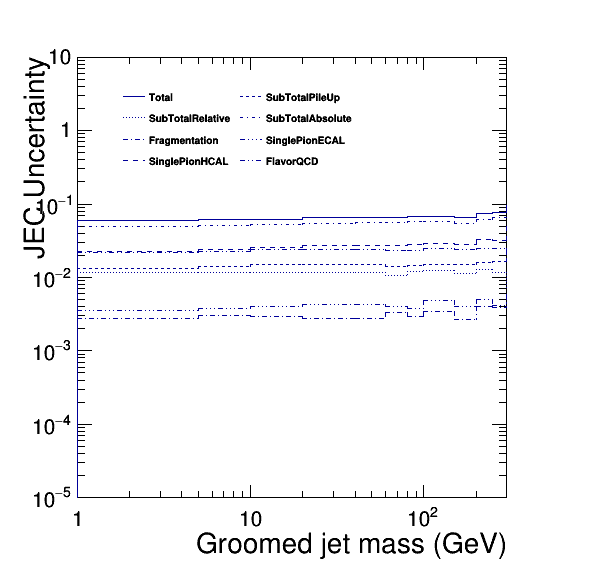

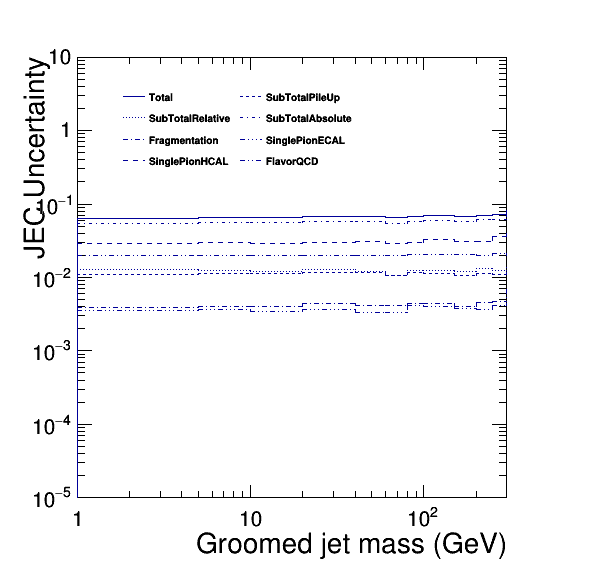

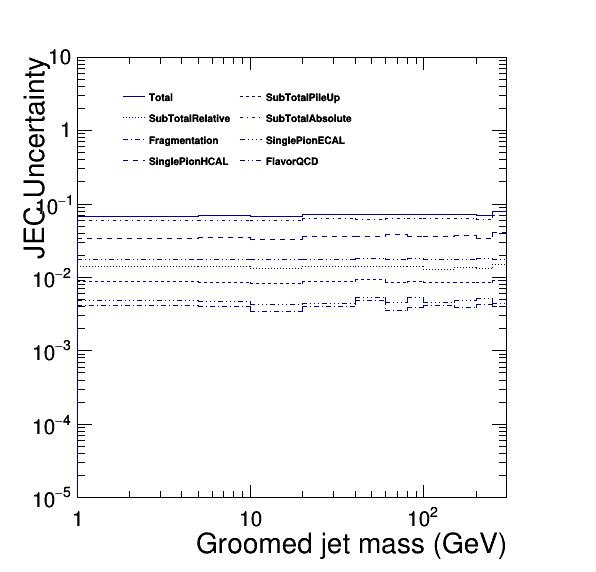

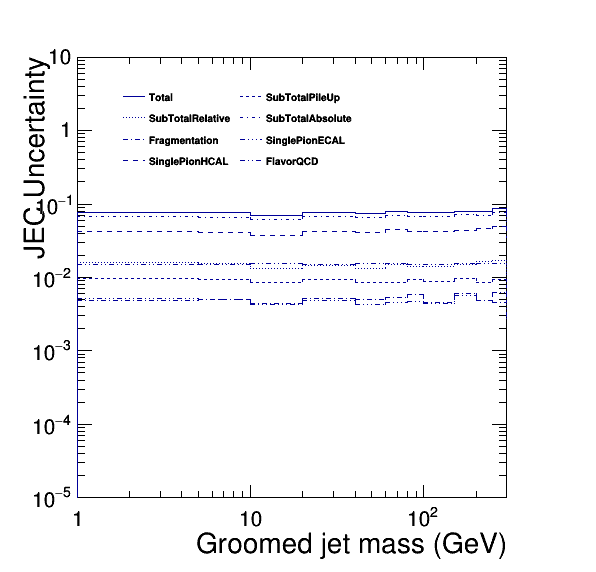

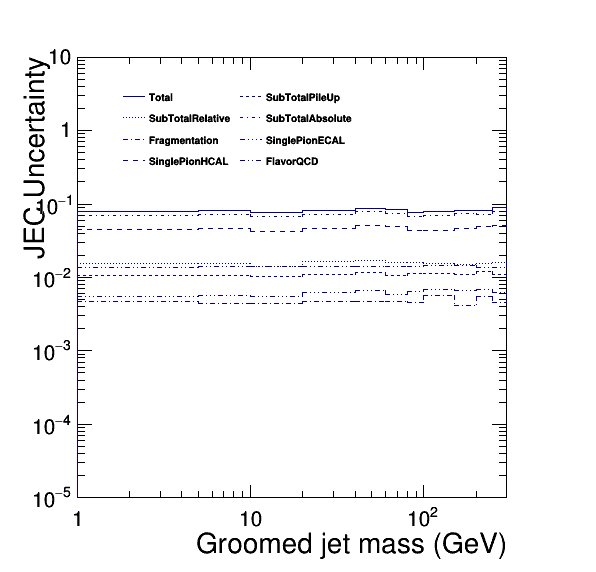

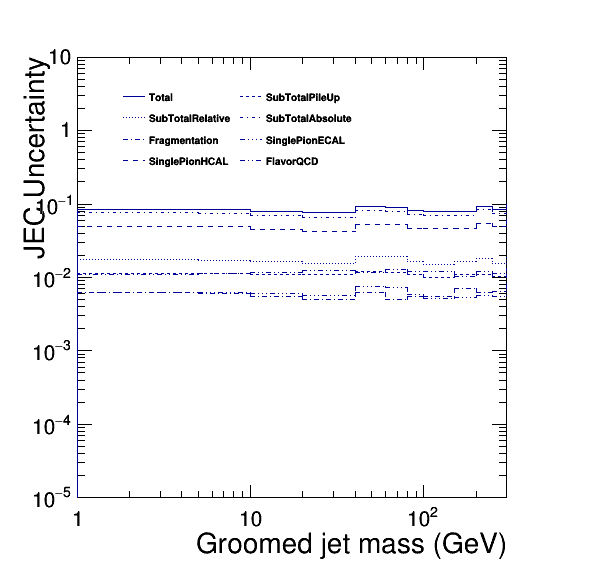

In [7]:


hists = []
canvs = []
stacks = []
for ipt in xrange(1,11) : 

    projsup = []
    projsdn = []

    for i,jec in enumerate(jecUncSrcs): 
        ptproj = jecsrcs[i][0].ProjectionX("projyup"+str(ipt) + "_" +str(i), ipt, ipt)
        ptproj.SetLineStyle( i + 1)
        projsup.append( ptproj )
        if ipt == 1: 
            leg.AddEntry( ptproj, jec, 'l')

    for i,jec in enumerate(jecUncSrcs):      
        ptproj = jecsrcs[i][1].ProjectionX("projydn"+str(ipt) + "_" +str(i), ipt, ipt)
        ptproj.SetLineStyle( i + 1)
        projsdn.append( ptproj )



    if 'softdrop' in softdropstr : 
        hup = ROOT.THStack("hup" + str(ipt), ";Groomed jet mass (GeV);JEC Uncertainty")
        hdn = ROOT.THStack("hdn" + str(ipt), ";Groomed jet mass (GeV);JEC Uncertainty")
    else : 
        hup = ROOT.THStack("hup" + str(ipt), ";Jet mass (GeV);JEC Uncertainty")
        hdn = ROOT.THStack("hdn" + str(ipt), ";Jet mass (GeV);JEC Uncertainty")    

    for i,jec in enumerate(jecUncSrcs): 
        setToAverage( projsup[i], projsup[i], projsdn[i] )
        ensureAbs( projsup[i] )
        hup.Add(projsup[i])    


    cup = ROOT.TCanvas("cup" + str(ipt), "cup" + str(ipt), 600,600)

    hup.Draw("nostack hist")
    hup.SetMinimum(1e-5)
    hup.SetMaximum(10)
    hup.GetXaxis().SetRangeUser(0,300)

    leg.Draw()

    cup.SetLogy()
    cup.SetLogx()

    cup.Draw()
    
    
    if scalePtBins: 
        cup.Print('jec_comparison_' + str(ipt) + '_normalized' + softdropstr + '.png', 'png')
        cup.Print('jec_comparison_' + str(ipt) + '_normalized' + softdropstr + '.pdf', 'pdf')
    else : 
        cup.Print('jec_comparison_' + str(ipt) + '_absolute' + softdropstr + '.png', 'png')
        cup.Print('jec_comparison_' + str(ipt) + '_absolute' + softdropstr + '.pdf', 'pdf')   
        
        
    hists.append([projsup, projsdn])
    canvs.append(cup)
    stacks.append([hup,hdn])